# Лабораторная работа №3

Работу выполнили:
* Куприянов Артур
* Колоколов Артём

## Импортирование библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Загружаем данные

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.shape

(303, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


## Подготовка данных

In [5]:
X = data.drop('target', axis=1)
y = data['target']

Разделим модели

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## Обучение модели

In [7]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## Предсказываем результаты

In [8]:
y_pred = svclassifier.predict(X_test)

In [9]:
print(y_pred[:10])

[0 1 0 1 1 1 1 1 0 0]


In [10]:
print(y_test[:10])

169    0
273    0
297    0
26     1
67     1
13     1
286    0
161    1
234    0
294    0
Name: target, dtype: int64


## Оценка алгоритма

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[20  4]
 [ 2 35]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        24
           1       0.90      0.95      0.92        37

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61



## Строми дерево

In [12]:
from sklearn.tree import DecisionTreeClassifier
TreeClassifier = DecisionTreeClassifier()
TreeClassifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
yTree_pred = TreeClassifier.predict(X_test)

In [14]:
print(yTree_pred[:10])

[0 0 0 0 0 0 0 0 0 1]


In [15]:
print(y_test[:10])

169    0
273    0
297    0
26     1
67     1
13     1
286    0
161    1
234    0
294    0
Name: target, dtype: int64


In [16]:
## Оценка алгоритма

In [17]:
print(confusion_matrix(y_test, yTree_pred))
print(classification_report(y_test, yTree_pred))

[[21  3]
 [11 26]]
              precision    recall  f1-score   support

           0       0.66      0.88      0.75        24
           1       0.90      0.70      0.79        37

    accuracy                           0.77        61
   macro avg       0.78      0.79      0.77        61
weighted avg       0.80      0.77      0.77        61



In [18]:
# используем .dot формат для визуализации дерева
from sklearn.tree import export_graphviz
# в feature_names можно прямо прописать названия признаков, а можно написать X_train.columns
export_graphviz(TreeClassifier, feature_names=X_train.columns, class_names=['0', '1'], 
out_file='small_tree.dot', filled=True)
# для этого понадобится библиотека pydot (pip install pydot)
!dot -Tpng 'small_tree.dot' -o 'small_tree.png'

# from subprocess import check_call
# check_call(['dot','-Tpng','small_tree.dot','-o','small_tree.png'])

"dot" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


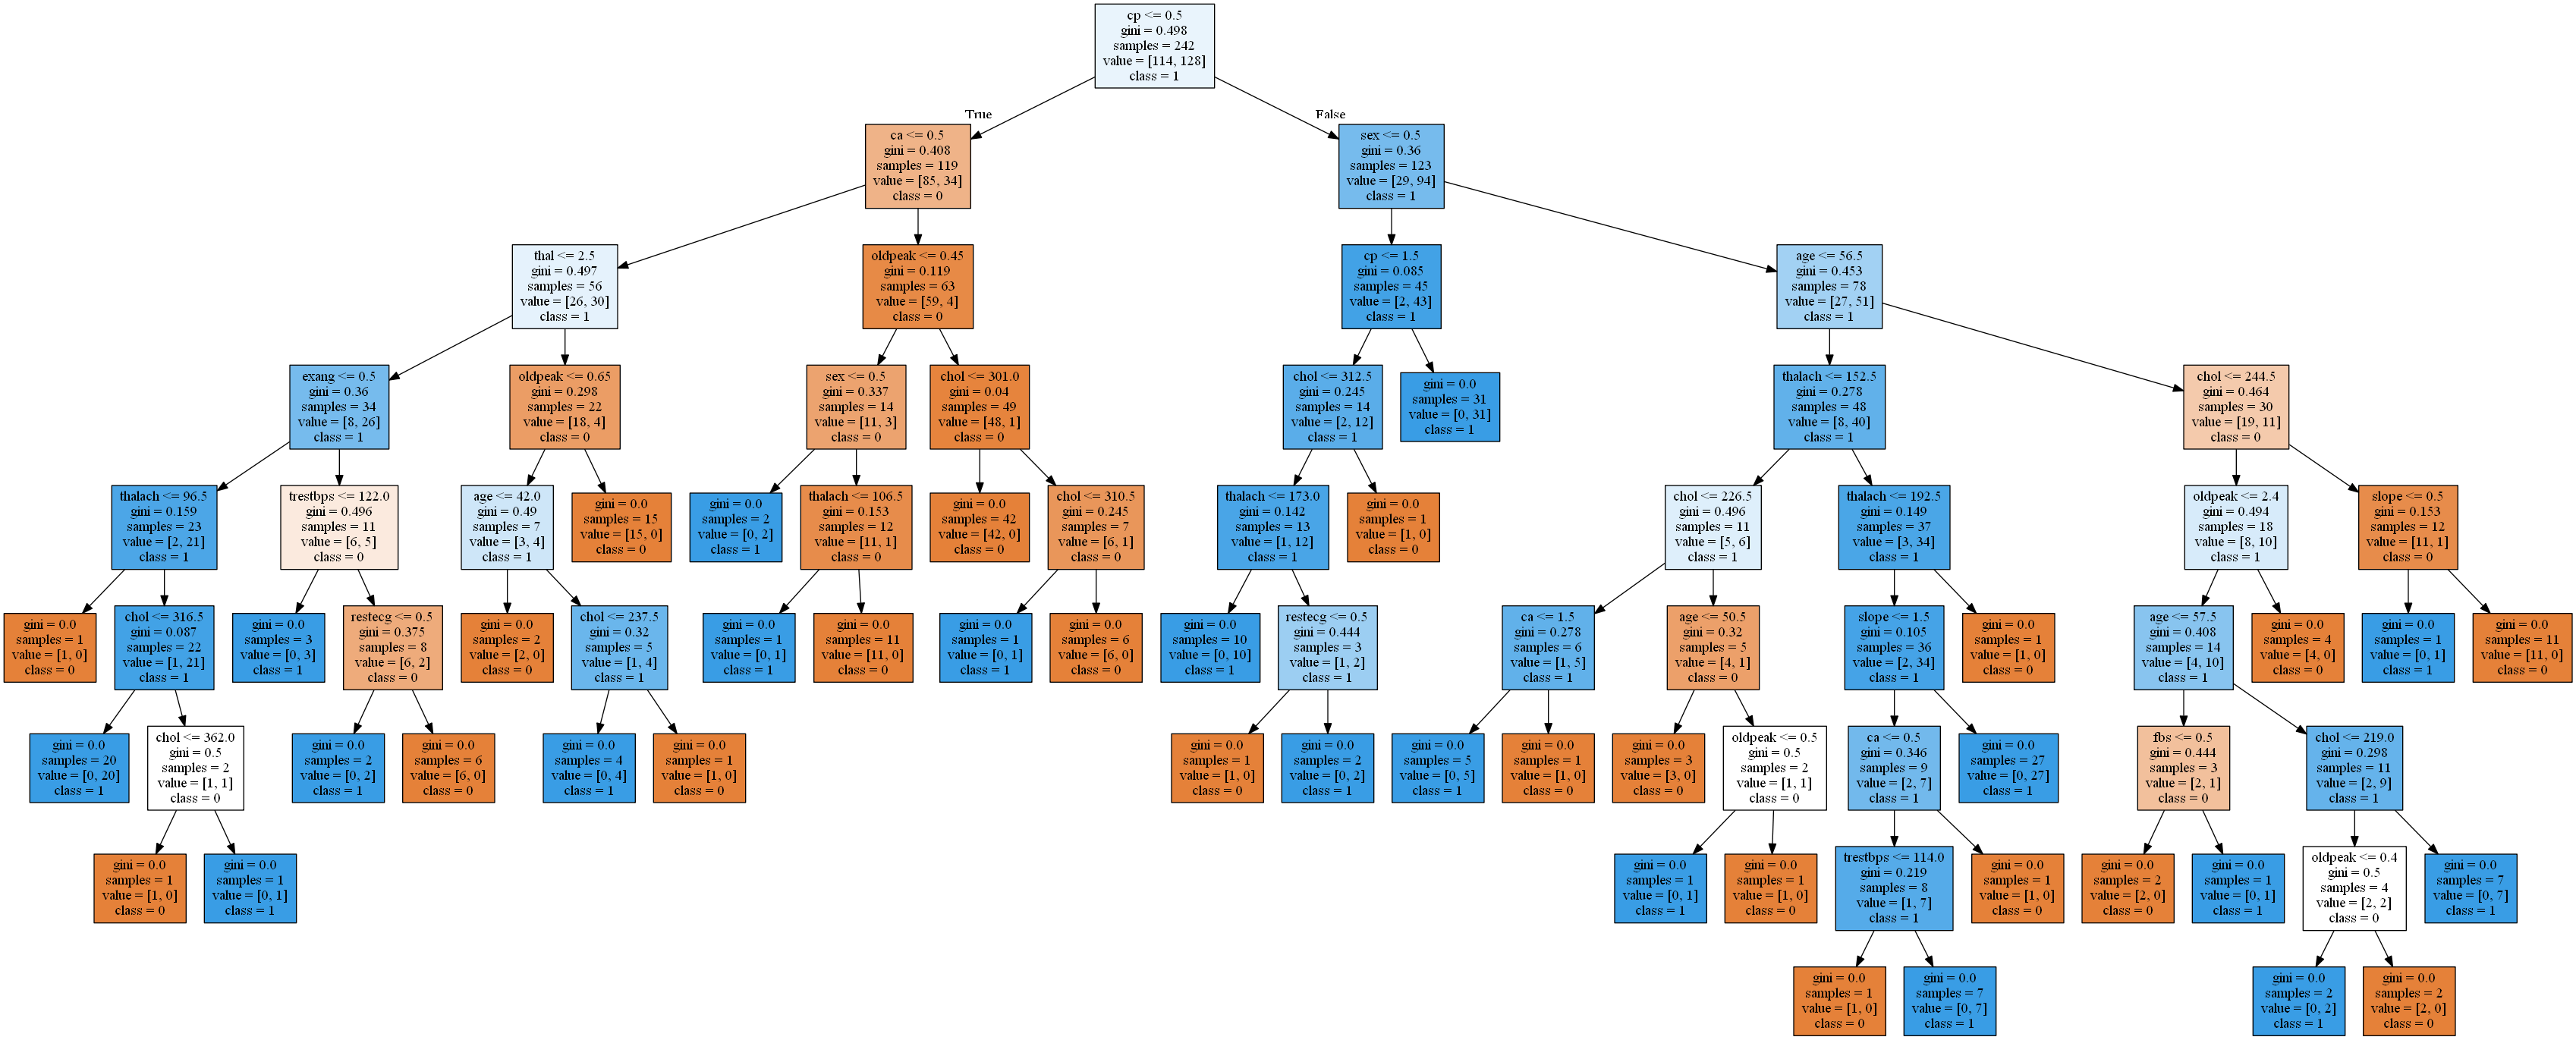

In [20]:
from IPython.display import Image 
from IPython.core.display import HTML 
Image("small_tree.png", width=1200)

## Строим дерево с ограничениями

In [30]:
TreeClassifier2 = DecisionTreeClassifier(max_features=5, max_depth=5)
TreeClassifier2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
yTree_pred = TreeClassifier2.predict(X_test)

In [32]:
print(confusion_matrix(y_test, yTree_pred))
print(classification_report(y_test, yTree_pred))

[[19  5]
 [ 4 33]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        24
           1       0.87      0.89      0.88        37

    accuracy                           0.85        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.85      0.85        61



In [33]:
# используем .dot формат для визуализации дерева
from sklearn.tree import export_graphviz
# в feature_names можно прямо прописать названия признаков, а можно написать X_train.columns
export_graphviz(TreeClassifier2, feature_names=X_train.columns, class_names=['0', '1'], 
out_file='small_tree2.dot', filled=True)

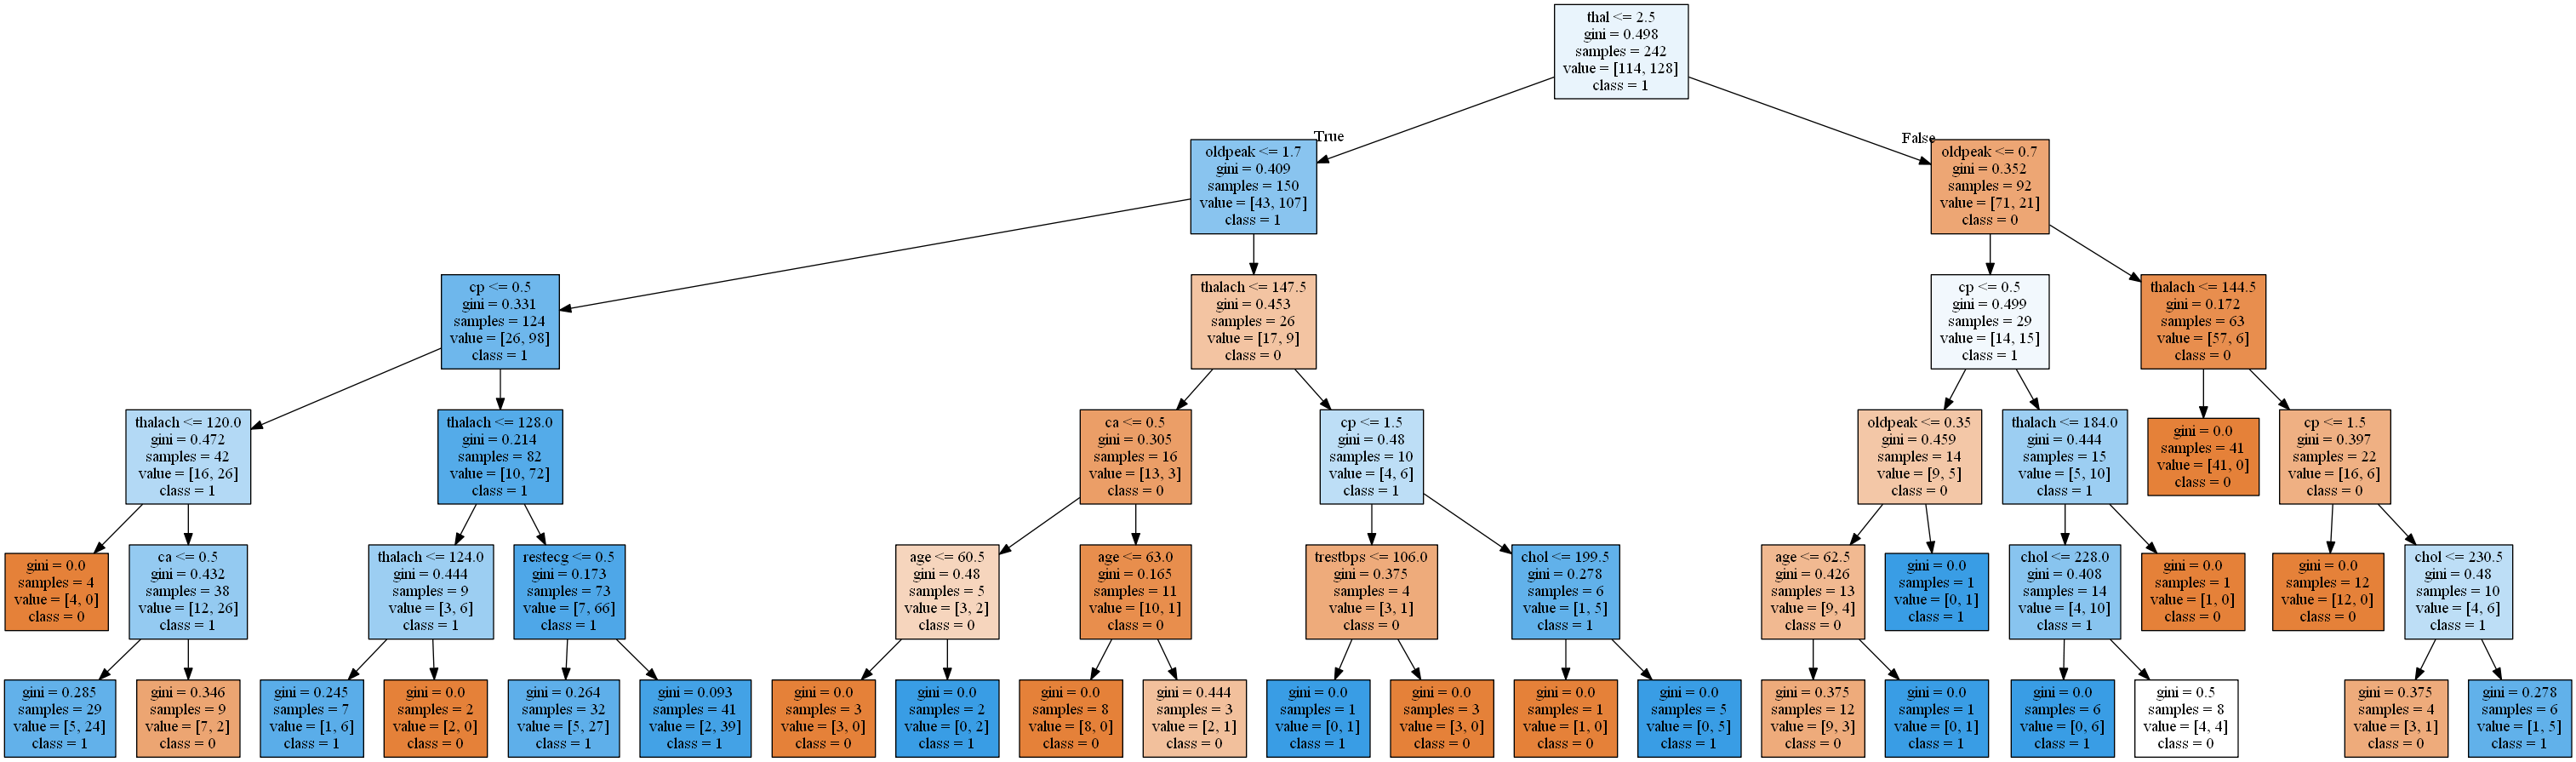

In [34]:
Image("small_tree2.png", width=1200)